In [5]:
# 1-Import necessary libraries

import numpy as np
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# imports for text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# imports for feature extraction methods
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# imports for models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# imports for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# 2-Load the dataset

df = pd.read_csv("/content/Hotel_reviews (2).csv")
df

,Review,Sentiment
0,poorest customer service satisfaction chain us...,negative
1,fantastic fantastic food rooms service pool be...,positive
2,average stay stayed vincci condal mar 6 nights...,negative
3,"hotel paradise, boyfriend vacationed paradisus...",positive
4,subpar hotel rude staff damaged car stayed hot...,negative
...,...,...
6423,best place relaxing holidays think london brid...,positive
6424,"robbed, great place stay terms location, stay ...",negative
6425,"anniversary surprise, booked night stay husban...",negative
6426,"true negative comments fools, word positive re...",positive


In [7]:
# Count the null and the duplicate values

null_count = df['Review'].isnull().sum()

# `keep='first'` marks all duplicates as True except for the first occurrence.
duplicate_count = df['Review'].duplicated(keep='first').sum()

print("Number of duplicate values in the Review column:", duplicate_count)
print("Number of null values in the Review column:", null_count)

Number of duplicate values in the Review column: 0
Number of null values in the Review column: 0


In [8]:
# Display sentiment counts
df['Sentiment'].value_counts()

Sentiment
negative    3214
positive    3214
Name: count, dtype: int64

In [9]:
# 3-Define a function for text preprocessing


# Define the function to process the text, including stemming and lemmatization
def clean_stem_lemmatize_text(text):

    # Tokenize the text and convert to lower case
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Initialize the stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Apply stemming and lemmatization
    stemmed_and_lemmatized_tokens = [
        lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens
    ]

    # Join the tokens back into a string
    processed_text = ' '.join(stemmed_and_lemmatized_tokens)

    # Return the processed text
    return processed_text

In [10]:
# Display the processed review
df['Review'] = df['Review'].apply(clean_stem_lemmatize_text)
df

,Review,Sentiment
0,poorest custom servic satisfact chain use rate...,negative
1,fantast fantast food room servic pool beach th...,positive
2,averag stay stay vincci condal mar 6 night jun...,negative
3,hotel paradis boyfriend vacat paradisu septemb...,positive
4,subpar hotel rude staff damag car stay hotel g...,negative
...,...,...
6423,best place relax holiday think london bridg ho...,positive
6424,rob great place stay term locat stay barcelona...,negative
6425,anniversari surpris book night stay husband wy...,negative
6426,true neg comment fool word posit review tripad...,positive


In [11]:
# 4-Vectorize the text data (convert the text data into numerical feature)

# Compare the Feature Extraction Methods:

# 1.TF-IDF

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Review'])


# 2.Bag of Words

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['Review'])


# 3.n-grams

ngram_vectorizer = CountVectorizer(ngram_range=(1,3))  #This captures unigrams and bigrams, trigrams
X_ngrams = ngram_vectorizer.fit_transform(df['Review'])

In [12]:
# Evaluating Sentiment Analysis Models with Various Text Feature Extraction Methods

# 1-Models Dictionary: Defines various machine learning models for sentiment analysis.

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machines": GradientBoostingClassifier(),
    "Naive Bayes Classifier": MultinomialNB()
}


# 2-Feature Methods Dictionary: Maps feature extraction method names to their corresponding feature matrices.
feature_methods = {
    "TF-IDF": X_tfidf,
    "Bag of Words": X_bow,
    "n-Grams": X_ngrams
}


labels = df['Sentiment'].values


# 3-Function to Evaluate Models: Trains and tests each model with the given features and labels, printing their accuracy.
def evaluate_models(features, labels, models, method_name):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    accuracies = []  # List to store each model's accuracy

    # Iterating over each model to train and evaluate it.
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"{name} Accuracy with {method_name}: {accuracy_score(y_test, y_pred)}")
        accuracies.append(accuracy_score(y_test, y_pred))  # Collect each model's accuracy

    # Calculate and print the average accuracy for the current feature method
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average Accuracy with {method_name}: {average_accuracy:.4f}")


# 4-Main Loop for Model Evaluation: Iterates over each feature extraction method to evaluate the defined models.
for method_name, features in feature_methods.items():
    print(f"Evaluating models with {method_name}")
    evaluate_models(features, labels, models, method_name)
    print("\n")

Evaluating models with TF-IDF
Logistic Regression Accuracy with TF-IDF: 0.9626749611197511
Random Forest Accuracy with TF-IDF: 0.9409020217729394
Gradient Boosting Machines Accuracy with TF-IDF: 0.9072058061171592
Naive Bayes Classifier Accuracy with TF-IDF: 0.9538621047174702
Average Accuracy with TF-IDF: 0.9412


Evaluating models with Bag of Words
Logistic Regression Accuracy with Bag of Words: 0.9574909279419388
Random Forest Accuracy with Bag of Words: 0.9351995852773458
Gradient Boosting Machines Accuracy with Bag of Words: 0.9082426127527217
Naive Bayes Classifier Accuracy with Bag of Words: 0.9543805080352514
Average Accuracy with Bag of Words: 0.9388


Evaluating models with n-Grams
Logistic Regression Accuracy with n-Grams: 0.9595645412130638
Random Forest Accuracy with n-Grams: 0.9258683255572836
Gradient Boosting Machines Accuracy with n-Grams: 0.902540176257128
Naive Bayes Classifier Accuracy with n-Grams: 0.9590461378952825
Average Accuracy with n-Grams: 0.9368




In [13]:
# 5-Select the model with high accuracy

def evaluate_models_with_tfidf(labels, models):

    global X_tfidf
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.3, random_state=42)
    accuracies = {}  # Dictionary to store model names and their accuracies

    # Iterating over each model to train and evaluate it using TF-IDF features.
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    # Sorting accuracies from high to low
    sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

    # Printing the sorted accuracies
    print("Model Accuracies with TF-IDF (High to Low):")
    for model, accuracy in sorted_accuracies:
        print(f"{model} Accuracy with TF-IDF: {accuracy}")

evaluate_models_with_tfidf(labels, models)

Model Accuracies with TF-IDF (High to Low):
Logistic Regression Accuracy with TF-IDF: 0.9626749611197511
Naive Bayes Classifier Accuracy with TF-IDF: 0.9538621047174702
Random Forest Accuracy with TF-IDF: 0.9388284085018144
Gradient Boosting Machines Accuracy with TF-IDF: 0.9077242094349404


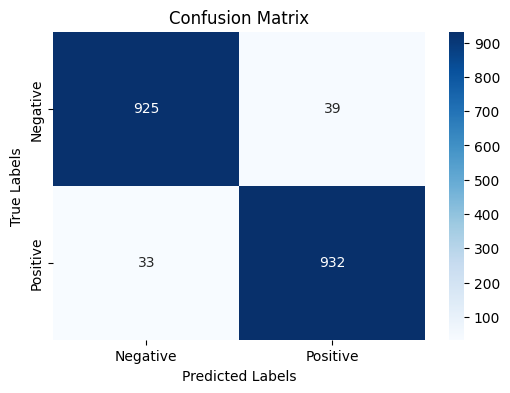

In [14]:
# 6-Model training

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

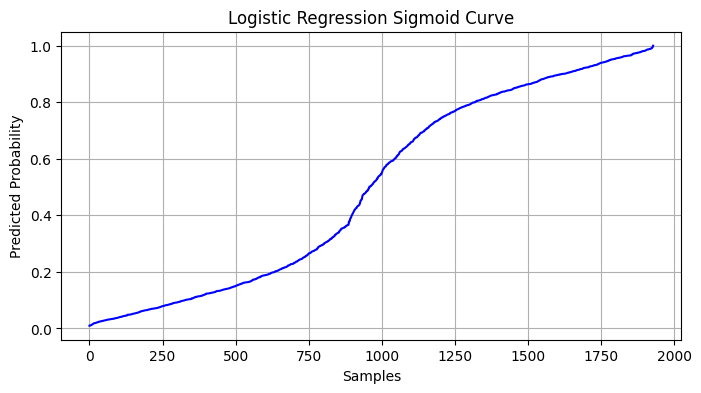

In [16]:
# 7-Model visualization by sigmoid (S-curve)

# Predict probabilities for the test set
probabilities = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Sort probabilities for smoother curve visualization
sorted_probabilities = np.sort(probabilities)

# Plotting the sigmoid curve
plt.figure(figsize=(8, 4))
plt.plot(sorted_probabilities, color='blue')
plt.xlabel('Samples')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Curve')
plt.grid(True)
plt.show()

In [15]:
# 8-Model Evaluation

# Evaluation
evaluation_logistic = classification_report(y_test, y_pred)
print(evaluation_logistic)

              precision    recall  f1-score   support

    negative       0.97      0.96      0.96       964
    positive       0.96      0.97      0.96       965

    accuracy                           0.96      1929
   macro avg       0.96      0.96      0.96      1929
weighted avg       0.96      0.96      0.96      1929



In [17]:
# 9-Make predictions with new examples

# Example reviews for prediction
review1 = ["Absolutely hated this place. Horrible food"]
review2 = ["Nice place. The staff were friendly"]

# apply clean_stem_lemmatize_text function to the reviews string
cleaned_review1 = clean_stem_lemmatize_text(review1[0])
cleaned_review2 = clean_stem_lemmatize_text(review2[0])

# Use 'tfidf_vectorizer' to transform the cleaned reviews
Xr_tfidf1 = tfidf_vectorizer.transform([cleaned_review1])
Xr_tfidf2 = tfidf_vectorizer.transform([cleaned_review2])

# Make a prediction using the logistic model
prediction1 = logistic_model.predict(Xr_tfidf1)
prediction2 = logistic_model.predict(Xr_tfidf2)

print("Prediction for review1:", prediction1)
print("Prediction for review2:", prediction2)

Prediction for review1: ['negative']
Prediction for review2: ['positive']
